<a href="https://colab.research.google.com/github/al025/Python_import_data/blob/master/chap2_regression_sklearn_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import basic packages (other packages for specific tasks will be imported later)
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [24]:
# use the built-in Boston Housing Price dataset
boston = datasets.load_boston()
print(type(boston))
print(boston.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
# assign the feature matrix and the target vector
X, y = boston.data, boston.target

In [0]:
# Since the target variable, price, is a continuous variable, we use linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# ordinary least squares (OLS) = sum((y_true - y_pred)^2)
# we use mean of squared residuals as a way to evaluate the linear model 
from sklearn.metrics import mean_squared_error


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
  test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root of Mean of Squared Residuals: {}".format(rmse))

R^2: 0.7112260057484974
Root of Mean of Squared Residuals: 4.638689926172788


### What is $R^2$? 
$R^2 = 1 - \frac{\sum_i (y\_true^{(i)} -y\_pred^{(i)})^2}{\sum_j(y\_true^{(j)}-\overline{y\_true})^2} $

LinearRegression.score(self, X, y)

Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [28]:
# to maximize the use of avaliable data, we can use cross validation 
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg, X, y, cv = 3)
print(cv_scores)
print("The average score of 3-fold cross validation: {}".format(np.mean(cv_scores)))
%timeit cross_val_score(reg, X, y, cv=3)

[ 0.5839083   0.53248448 -5.86898835]
The average score of 3-fold cross validation: -1.584198522099707
100 loops, best of 3: 4.26 ms per loop


In [43]:
cv_scores = cross_val_score(reg, X, y, cv = 10)
print(cv_scores)
print("The average score of 10-fold cross validation: {}".format(np.mean(cv_scores)))
%timeit cross_val_score(reg, X, y, cv=10)
# a 10-fold cv is more computationally expensive

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
The average score of 10-fold cross validation: 0.20252899006055863
100 loops, best of 3: 13.6 ms per loop


[-0.          0.         -0.          0.         -0.          1.76047366
 -0.          0.         -0.         -0.         -0.          0.
 -0.34625676]


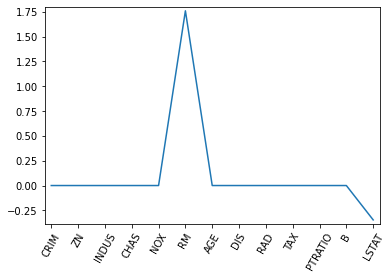

In [30]:
# we can regularize our model to avoid overfitting 
# one way of regularization is L1 regularization (adding the L1 norm of coefficients to the loss function)
# aka Lasso regularization. Lasso is good for selecting the most important features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2, normalize=True)  # Question: try different alpha values: 0.1, 0.2, 0.3, 0.4. Why different features would be chosen as
                        # the most important feature (its coefficient has the greatest magnitude?)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
print(lasso_coef)

plt.plot(range(len(boston.feature_names)), lasso_coef)
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
plt.margins(0.02)
plt.show()

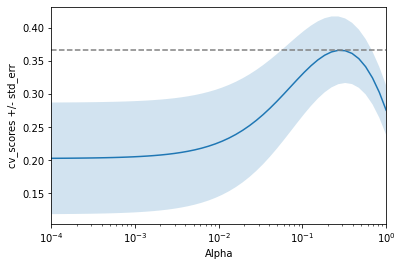

In [42]:
# another way of regularization is L2 regularization (adding the L2 norm of the coefficents to the loss function)
# aka Ridge regularization (more commonly used)
# alpha: the weight of the added term in the loss function is a hyperparameter 
# we can tune alpha by trying different values and pick the one results in highest cross validation score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(normalize=True)
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
std_ridge_scores = []

for alpha in alpha_space:
  ridge.alpha = alpha
  cvs = cross_val_score(ridge, X, y, cv=10)
  ridge_scores.append(np.mean(cvs))
  std_ridge_scores.append(np.std(cvs))

def display_plot(alpha_space, cv_scores, std_cv_scores):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.plot(alpha_space, cv_scores)

  std_err = std_cv_scores / np.sqrt(len(cv_scores))

  ax.fill_between(alpha_space, cv_scores + std_err, cv_scores - std_err,
                  alpha=0.2)
  ax.set_ylabel('cv_scores +/- std_err')
  ax.set_xlabel('Alpha')
  ax.axhline(max(cv_scores), linestyle='--', color='.5')
  ax.set_xlim(min(alpha_space), max(alpha_space))
  ax.set_xscale('log')
  plt.show()

display_plot(alpha_space, ridge_scores, std_ridge_scores)